In [1]:
#import the libraries
import numpy as np
import pandas as pd

#visualization
import matplotlib.pyplot as plt 
import seaborn as sns
import plotly.express as px
%matplotlib inline

In [3]:
#Import the data set, ‘insurance’. The column ‘charges’ should be considered as your target label.

df = pd.read_csv('insurance.csv')
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [5]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [6]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [7]:
x= df.drop('charges', 1)
y = df ['charges']
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [11]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x ,y, test_size = 0.2)
X_train.head()

,age,sex,bmi,children,smoker,region
622,49,female,21.300,1,no,southwest
813,28,male,22.515,2,no,northeast
955,31,male,39.490,1,no,southeast
52,48,male,28.000,1,yes,southwest
251,63,female,32.200,2,yes,southwest


In [12]:
#2. Explore the data using at least 3 data exploratory tools of your choosing in pandas and interpret your observation 
#in a markdown cell of what form of predictive analysis that can be conducted on the data.

cor = df.corr()

<AxesSubplot:>

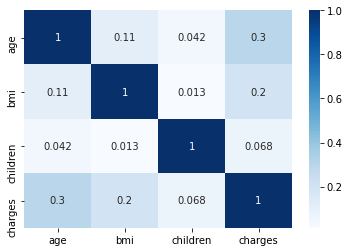

In [13]:
sns.heatmap(cor, annot = True, cmap = 'Blues')

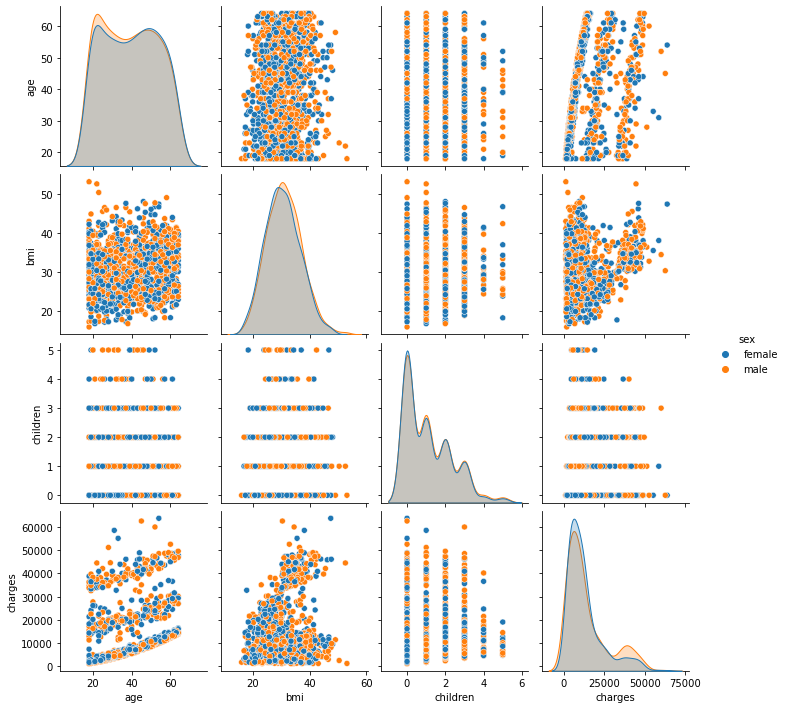

In [14]:

sns.pairplot(hue= 'sex', data = df)

In [16]:
df.groupby(['region']).size()

region
northeast    324
northwest    325
southeast    364
southwest    325
dtype: int64

In [17]:
df.groupby(['region', 'sex']).size()

region     sex   
northeast  female    161
           male      163
northwest  female    164
           male      161
southeast  female    175
           male      189
southwest  female    162
           male      163
dtype: int64

In [21]:
freq_table = df.groupby(['region', 'sex','smoker']).size().reset_index(name ='count').rename(columns = {'region':'region'})
freq_table

,region,sex,smoker,count
0,northeast,female,no,132
1,northeast,female,yes,29
2,northeast,male,no,125
3,northeast,male,yes,38
4,northwest,female,no,135
5,northwest,female,yes,29
6,northwest,male,no,132
7,northwest,male,yes,29
8,southeast,female,no,139
9,southeast,female,yes,36


<BarContainer object of 16 artists>

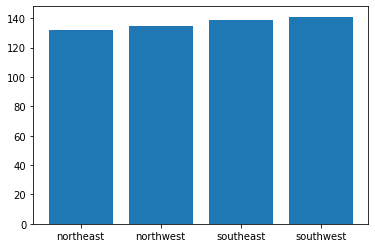

In [24]:
plt.bar(freq_table['region'], freq_table['count'])

<AxesSubplot:xlabel='region', ylabel='count'>

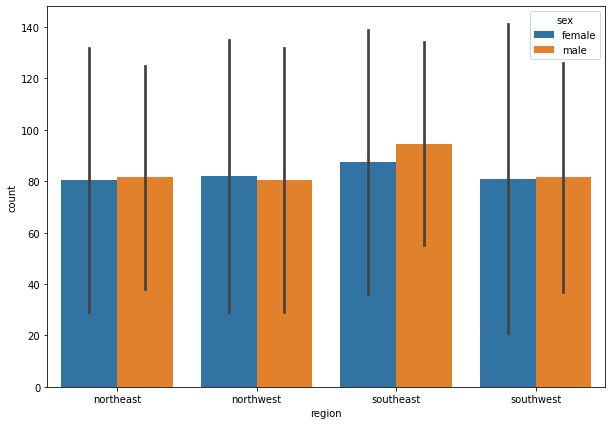

In [25]:
plt.figure(figsize = (10,7))
sns.barplot(x= 'region', y ='count', hue = 'sex', data =freq_table)

Text(0, 0.5, 'count')

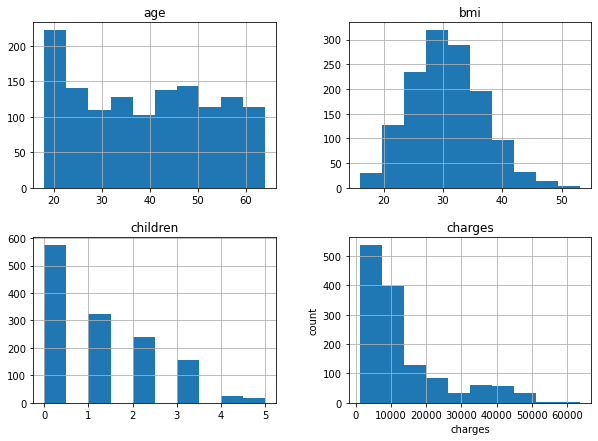

In [26]:
df.hist(figsize =(10,7))
plt.title('charges')
plt.xlabel('charges')
plt.ylabel('count')

<AxesSubplot:>

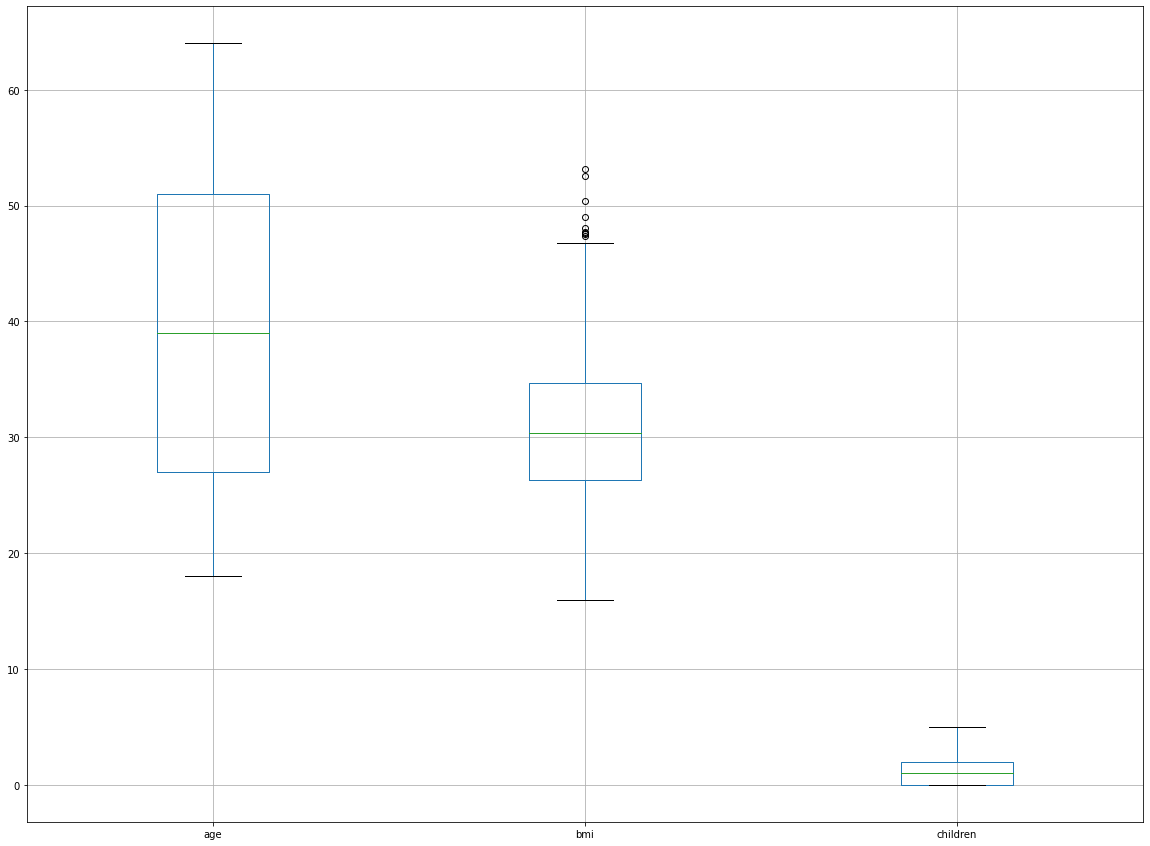

In [27]:
plt.figure(figsize = (20,15))
df.drop('charges',axis = 1).boxplot()

In [29]:
#3. Visualize the age distribution for the column ‘age’ and comment on the results in a markdown cell as well.
df.age.max()

64

In [30]:
df.age.min()

18

In [31]:
age_range = []
for age in range (10,70,10):
    age_range.append('{0} - {1}'.format(age, age + 9.0))

df['age_range'] = pd.cut(x = df['age'], bins = 6, labels = age_range)
df

,age,sex,bmi,children,smoker,region,charges,age_range
0,19,female,27.900,0,yes,southwest,16884.92400,10 - 19.0
1,18,male,33.770,1,no,southeast,1725.55230,10 - 19.0
2,28,male,33.000,3,no,southeast,4449.46200,20 - 29.0
3,33,male,22.705,0,no,northwest,21984.47061,20 - 29.0
4,32,male,28.880,0,no,northwest,3866.85520,20 - 29.0
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,50 - 59.0
1334,18,female,31.920,0,no,northeast,2205.98080,10 - 19.0
1335,18,female,36.850,0,no,southeast,1629.83350,10 - 19.0
1336,21,female,25.800,0,no,southwest,2007.94500,10 - 19.0


In [39]:
age_range_hist = df['age_range']
age_hist = pd.DataFrame(age_range_hist).value_counts().reset_index()
age_hist.columns = ['age_range','count']
age_hist

,age_range,count
0,10 - 19.0,306
1,50 - 59.0,223
2,20 - 29.0,217
3,30 - 39.0,205
4,40 - 49.0,197
5,60 - 69.0,190


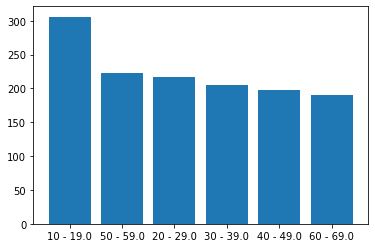

In [41]:
plt.bar(age_hist['age_range'], age_hist['count'])
plt.show()

#the sample contained a majority of individuals between the the of 10 to 19 followed by those of between 50 to 59 and the least were btween 60 to 69

In [42]:
# 4. Isolate all the continuous and discrete columns into their respective lists
#named ‘numerical_continuous’ and ‘numerical_discrete’ respectively.

pd.pandas.set_option('display.max_columns', None)

In [43]:
numerical = [var for var in X_train.columns if df[var].dtype != 'object']
numerical

['age', 'bmi', 'children']

In [44]:
numerical_continuous  = [var for var in numerical if 'age' in var or 'bmi' in var]
numerical_continuous


['age', 'bmi']

In [45]:
numerical_discrete = [var for var in numerical if var not in numerical_continuous]
numerical_discrete

['children']

In [49]:
#5. Visually identify if there is presence of any outliers in the numerical_continuous columns and
#resolve them using a zscore test and a threshold of your choosing.

for var in numerical_continuous[:]:
    if var == 'age_range':
        numerical_continuous.remove(var)
print(numerical_continuous)

['age', 'bmi']


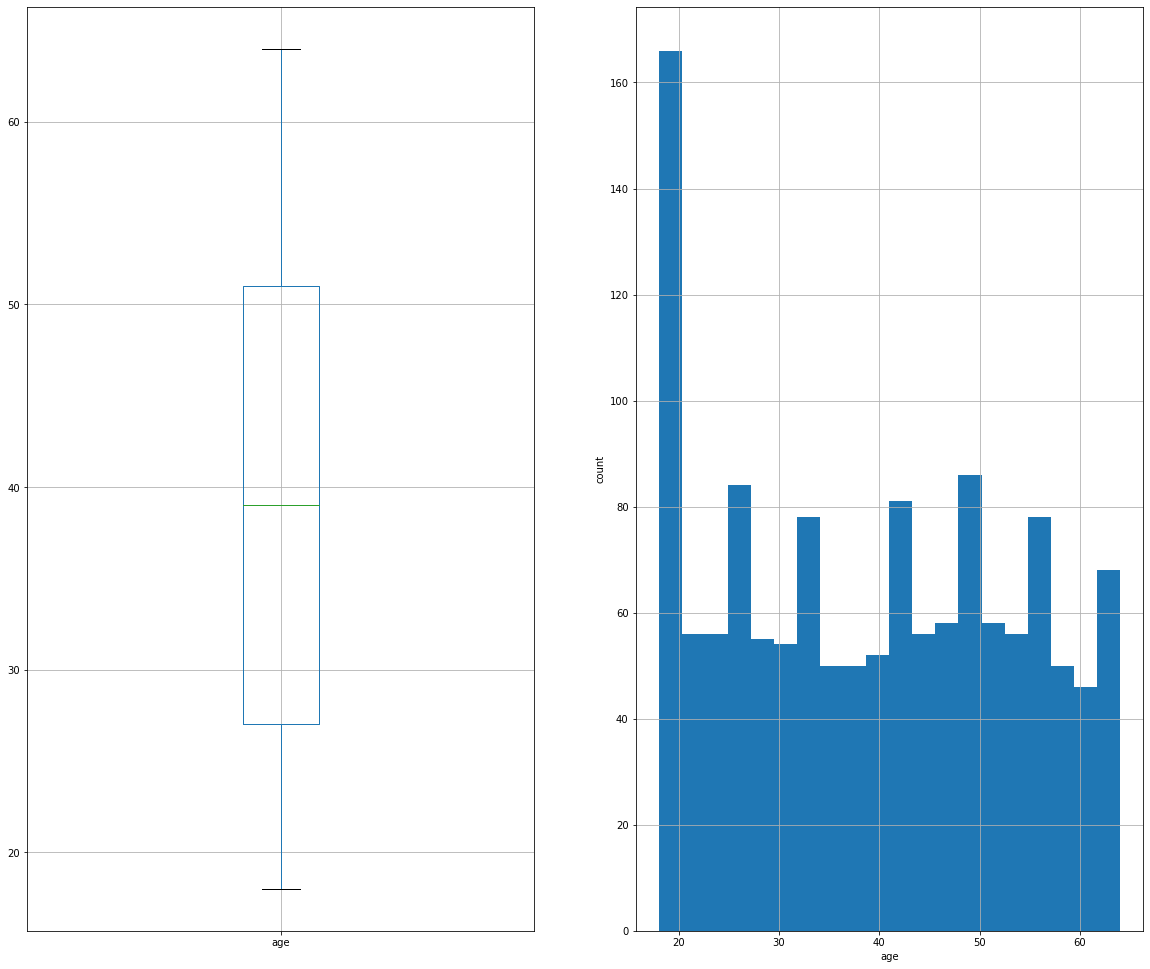

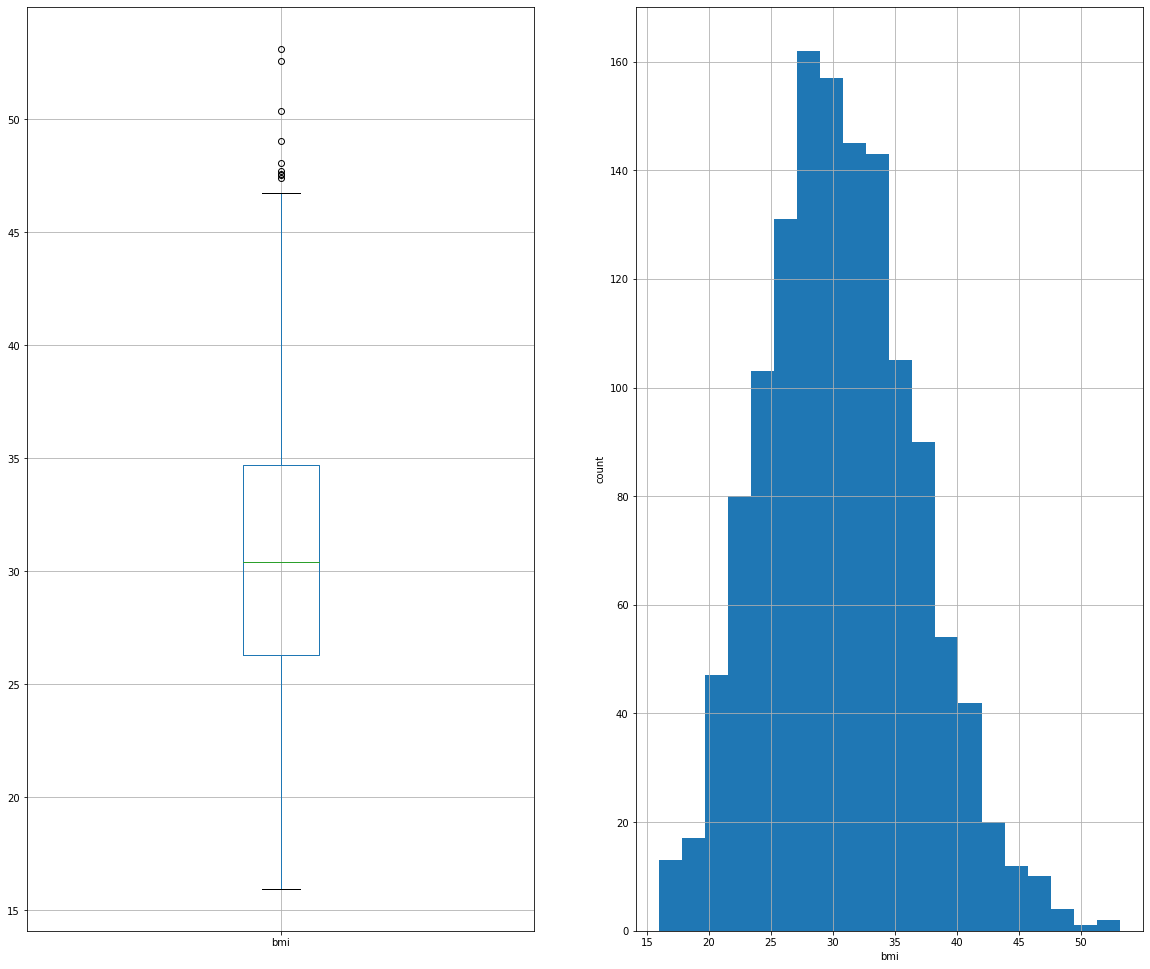

In [50]:
#visualize
for var in numerical_continuous:
    plt.figure(figsize =(20,17))
    plt.subplot(1,2,1)
    fig = df.boxplot(column = var)
    
    plt.subplot(1,2,2)
    fig = df[var].hist(bins = 20)
    fig.set_ylabel('count')
    fig.set_xlabel(var)

In [51]:

df['zscore_bmi'] = (df.bmi - df.bmi.mean())/df.bmi.std()
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,10 - 19.0,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,10 - 19.0,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,20 - 29.0,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,20 - 29.0,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,20 - 29.0,-0.292447


In [67]:
df[(df.zscore_bmi < -3)|(df.zscore_bmi > 3)]

,age,sex,bmi,children,smoker,region,charges,age_range,zscore_bmi
116,58,male,49.06,0,no,southeast,11381.3254,60 - 69.0,3.016733
847,23,male,50.38,1,no,southeast,2438.0552,10 - 19.0,3.233191
1047,22,male,52.58,1,yes,southeast,44501.3982,10 - 19.0,3.593954
1317,18,male,53.13,0,no,southeast,1163.4627,10 - 19.0,3.684145


In [71]:
df_no_bmi_outliers = df[(df.zscore_bmi > -3)&(df.zscore_bmi < 3)]
df_no_bmi_outliers.head()

,age,sex,bmi,children,smoker,region,charges,age_range,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,10 - 19.0,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,10 - 19.0,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,20 - 29.0,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,20 - 29.0,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,20 - 29.0,-0.292447


In [72]:
df.shape

(1338, 9)

In [75]:
df_no_bmi_outliers.shape

(1334, 9)

<AxesSubplot:>

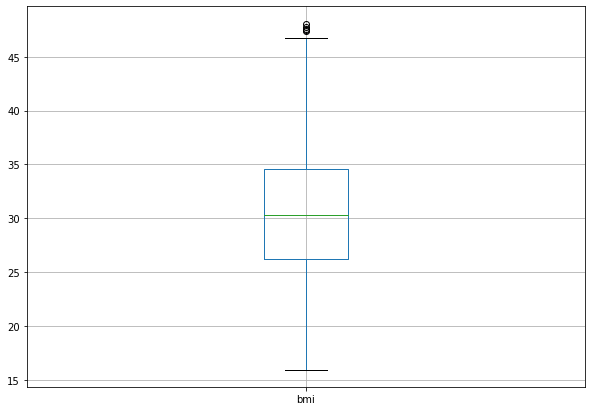

In [80]:
#6. Validate that your analysis above was successful by visualizing the value distribution in the resulting columns using an appropriate visualization method.


plt.figure(figsize = (10,7))
df_no_bmi_outliers.boxplot(column = 'bmi')

In [85]:
#using quantiles
log_bmi = np.log1p(df_no_bmi_outliers['bmi'])
log_bmi

0       3.363842
1       3.548755
2       3.526361
3       3.165686
4       3.397189
          ...   
1333    3.464798
1334    3.494080
1335    3.633631
1336    3.288402
1337    3.403528
Name: bmi, Length: 1334, dtype: float64

C:\Users\Suhaam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

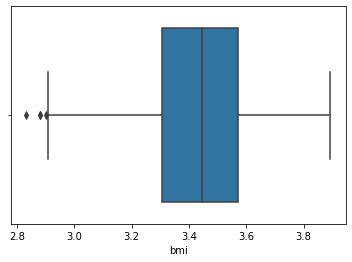

In [91]:
sns.boxplot(log_bmi)

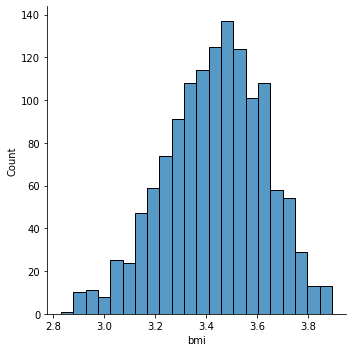

In [92]:
sns.displot(log_bmi)

In [100]:
#use a lower threshold of 3 and an upper threshold of 3.8
print(log_bmi.quantile(0.10),log_bmi.quantile(0.95))

3.177637076851603 3.730799374170302


In [103]:
print(log_bmi.skew(),df_no_bmi_outliers.bmi.skew())

-0.280107594694374 0.20562242767805047


In [104]:
from scipy import stats

In [108]:
zscore = np.abs(stats.zscore(log_bmi))
zscore


array([0.36597946, 0.58808736, 0.47254257, ..., 1.02600818, 0.75521324,
       0.1612161 ])

In [111]:
np.where(zscore > 3)

(array([171], dtype=int64),)

In [117]:
all_df_no_bmi_outliers =df_no_bmi_outliers.loc[(np.log1p(df_no_bmi_outliers.bmi)>= 3)&(np.log1p(df_no_bmi_outliers.bmi)<= 3.8)] 
all_df_no_bmi_outliers.head()

,age,sex,bmi,children,smoker,region,charges,age_range,zscore_bmi
0,19,female,27.900,0,yes,southwest,16884.92400,10 - 19.0,-0.453151
1,18,male,33.770,1,no,southeast,1725.55230,10 - 19.0,0.509431
2,28,male,33.000,3,no,southeast,4449.46200,20 - 29.0,0.383164
3,33,male,22.705,0,no,northwest,21984.47061,20 - 29.0,-1.305043
4,32,male,28.880,0,no,northwest,3866.85520,20 - 29.0,-0.292447


C:\Users\Suhaam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='bmi'>

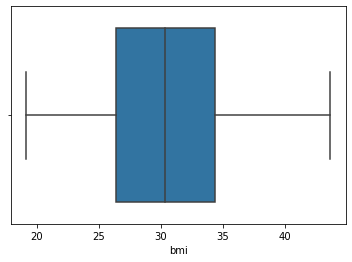

In [120]:
bmi_1 = all_df_no_bmi_outliers.bmi
sns.boxplot(bmi_1)

In [125]:
#7. Isolate all the categorical column names into a list named ‘categorical’.
categorical = [var for var in df.columns if df[var].dtype == 'object']
categorical

['sex', 'smoker', 'region']

In [126]:
df[['sex','smoker','region']]

,sex,smoker,region
0,female,yes,southwest
1,male,no,southeast
2,male,no,southeast
3,male,no,northwest
4,male,no,northwest
...,...,...,...
1333,male,no,northwest
1334,female,no,northeast
1335,female,no,southeast
1336,female,no,southwest


In [176]:
#8. Visually identify the outliers in the discrete and categorical features and resolve them using the combined rare levels method.
discrete =[]
for var in discrete:
    (X_train.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

C:\Users\Suhaam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='children'>

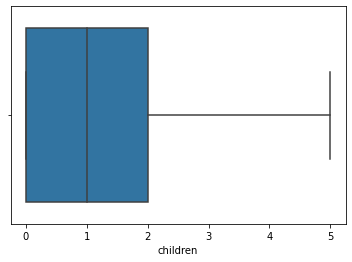

In [174]:
children = df.children
sns.boxplot(children)

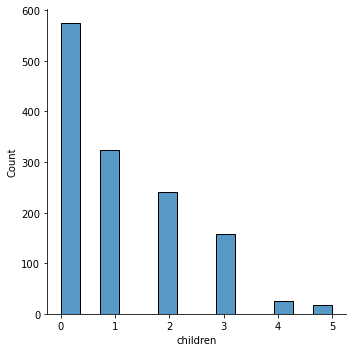

In [140]:
sns.displot(children)

C:\Users\Suhaam\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='charges'>

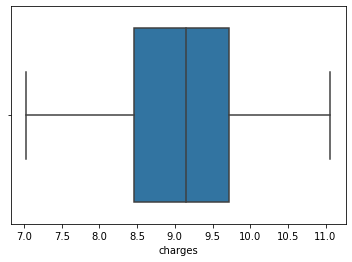

In [142]:
log_charges = np.log1p(df['charges'])
sns.boxplot(log_charges)

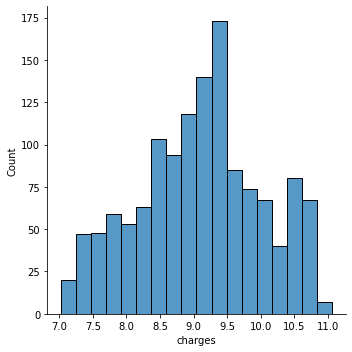

In [144]:
sns.displot(log_charges)

In [145]:
#identifying outliers in the categorical features
from sklearn.model_selection import train_test_split

In [148]:
X_train,X_test,y_train,y_test = train_test_split(x, y, test_size = 0.2)

In [150]:
X_train.head()

,age,sex,bmi,children,smoker,region
607,59,female,23.655,0,yes,northwest
701,50,female,44.745,0,no,northeast
261,20,female,26.840,1,yes,southeast
348,36,female,29.920,1,no,southeast
675,45,male,21.375,0,no,northwest


In [151]:
y_train.head()

607    25678.77845
701     9541.69555
261    17085.26760
348     5478.03680
675     7222.78625
Name: charges, dtype: float64

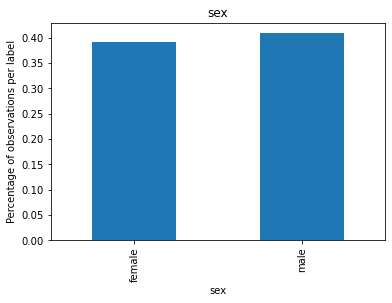

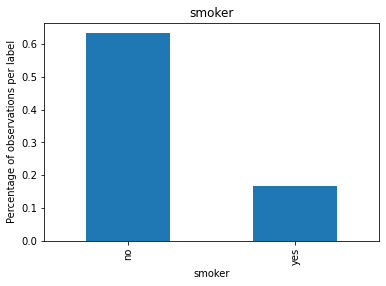

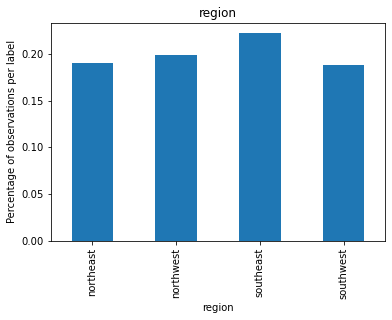

In [153]:
#VISUALIZING
for var in categorical:
    (X_train.groupby(var)[var].count() / np.float(len(df))).plot.bar()
    plt.ylabel('Percentage of observations per label')
    plt.title(var)
    plt.show()

In [154]:
#9. Encode the discrete and categorical features with one of the measures of central tendency of your choosing.
df.charges

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [177]:
def encode_cat_vars(var, target):
    ordered_labels = df.groupby([var])[target].mean().to_dict()
    df[var] = df[var].map(ordered_labels)
    
    
for var in categorical:
    encode_cat_vars(var,'charges')
for var in discrete:
    encode_cat_vars(var,'charges')
df.head()

,age,sex,bmi,children,smoker,region,charges,age_range,zscore_bmi
0,19,12569.578844,27.900,0,32050.231832,12346.937377,16884.92400,10 - 19.0,-0.453151
1,18,13956.751178,33.770,1,8434.268298,14735.411438,1725.55230,10 - 19.0,0.509431
2,28,13956.751178,33.000,3,8434.268298,14735.411438,4449.46200,20 - 29.0,0.383164
3,33,13956.751178,22.705,0,8434.268298,12417.575374,21984.47061,20 - 29.0,-1.305043
4,32,13956.751178,28.880,0,8434.268298,12417.575374,3866.85520,20 - 29.0,-0.292447


In [156]:
#10. Separate your features from the target appropriately. 
#Narrow down the number of features to 5 using the most appropriate and accurate method. 
#Which feature had to be dropped and what inference would you give as the main contributor of dropping the given feature.

df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges',
       'age_range', 'zscore_bmi'],
      dtype='object')

In [167]:
X = df.drop('charges', 1)
y = df['charges']
X.head()

,age,sex,bmi,children,smoker,region,age_range,zscore_bmi
0,19,12569.578844,27.900,0,32050.231832,12346.937377,10 - 19.0,-0.453151
1,18,13956.751178,33.770,1,8434.268298,14735.411438,10 - 19.0,0.509431
2,28,13956.751178,33.000,3,8434.268298,14735.411438,20 - 29.0,0.383164
3,33,13956.751178,22.705,0,8434.268298,12417.575374,20 - 29.0,-1.305043
4,32,13956.751178,28.880,0,8434.268298,12417.575374,20 - 29.0,-0.292447


In [168]:
X.drop('zscore_bmi', axis = 1, inplace = True)
X.drop('age_range', axis = 1, inplace = True)

x.head()

,age,sex,bmi,children,smoker,region
0,19,female,27.900,0,yes,southwest
1,18,male,33.770,1,no,southeast
2,28,male,33.000,3,no,southeast
3,33,male,22.705,0,no,northwest
4,32,male,28.880,0,no,northwest


In [169]:
import statsmodels.api as sm

In [170]:
X_1 = sm.add_constant(X)
model = sm.OLS(y,X_1).fit()
model.pvalues

const       4.086151e-06
age         4.896316e-89
sex         7.001298e-01
bmi         1.127241e-29
children    6.588212e-04
smoker      0.000000e+00
region      5.265218e-01
dtype: float64

In [171]:
#using a while loop to iterate through the features with the Backward elimination of the Wrapper method, the Ml drops the two features sex and region as shown below.

cols = list(X.columns)
pmax = 1
while(len(cols)>0):
    p = []
    X_1 = X[cols]
    X_1 = sm.add_constant(X_1)
    model = sm.OLS(y,X_1).fit()
    p = pd.Series(model.pvalues.values[1:],index = cols)
    pmax = max(p)
    feature_with_p_max = p.idxmax()
    if(pmax>0.05):
        cols.remove(feature_with_p_max)
    else:
        break
    
selected_features = cols
selected_features

['age', 'bmi', 'children', 'smoker']